In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plots

In [117]:
# Get officer salary data

salary = pd.read_csv("salary/salary-filled_2002-2017_2017-09.csv.gz", compression = "gzip")
salary_cleaned = salary.get(["UID", "pay_grade", "salary"])
salary_cleaned = salary_cleaned.dropna(subset = ["salary"])
salary_cleaned

,UID,pay_grade,salary
0,100013.0,D|2A,64356.0
1,100014.0,D|1,57426.0
2,100015.0,D|1,61512.0
3,100016.0,D|1,54672.0
4,100019.0,D|1,52092.0
...,...,...,...
212503,105895.0,D|1,72510.0
212504,116362.0,D|1,72510.0
212505,133026.0,D|1,48078.0
212506,119273.0,D|1,87006.0


In [150]:
# Get officer profile data

officer_profiles = pd.read_csv("profiles/officer-profiles.csv.gz", compression = "gzip", low_memory=False)
officer_profiles_cleaned = officer_profiles.get(["UID", "race", "cleaned_rank", "appointed_date", "resignation_date", "gender"])
officer_profiles_cleaned = officer_profiles_cleaned.dropna(subset = ["race"])
officer_profiles_cleaned


,UID,race,cleaned_rank,appointed_date,resignation_date,gender
0,100001,WHITE,NaN,1950-06-03,1980-03-10,MALE
1,100002,WHITE,NaN,1956-09-01,1979-10-18,MALE
2,100003,WHITE,NaN,1968-06-24,1980-10-01,MALE
3,100004,WHITE,NaN,1953-09-28,1980-10-01,MALE
4,100005,BLACK,POLICE OFFICER,1966-06-20,1986-09-16,MALE
...,...,...,...,...,...,...
33666,133667,WHITE,NaN,2017-05-16,NaN,MALE
33667,133668,BLACK,NaN,NaN,NaN,FEMALE
33668,133669,WHITE,NaN,NaN,NaN,MALE
33669,133670,BLACK,NaN,NaN,NaN,FEMALE


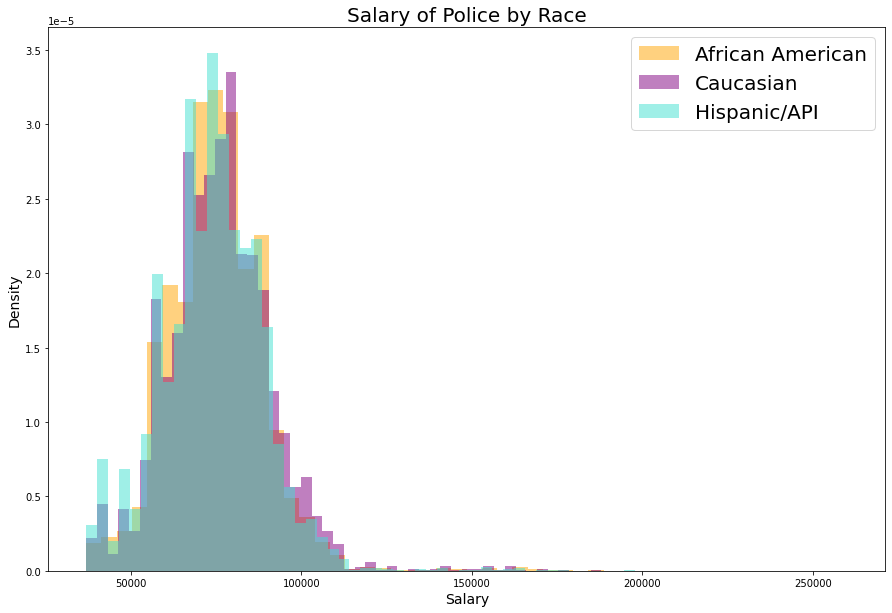

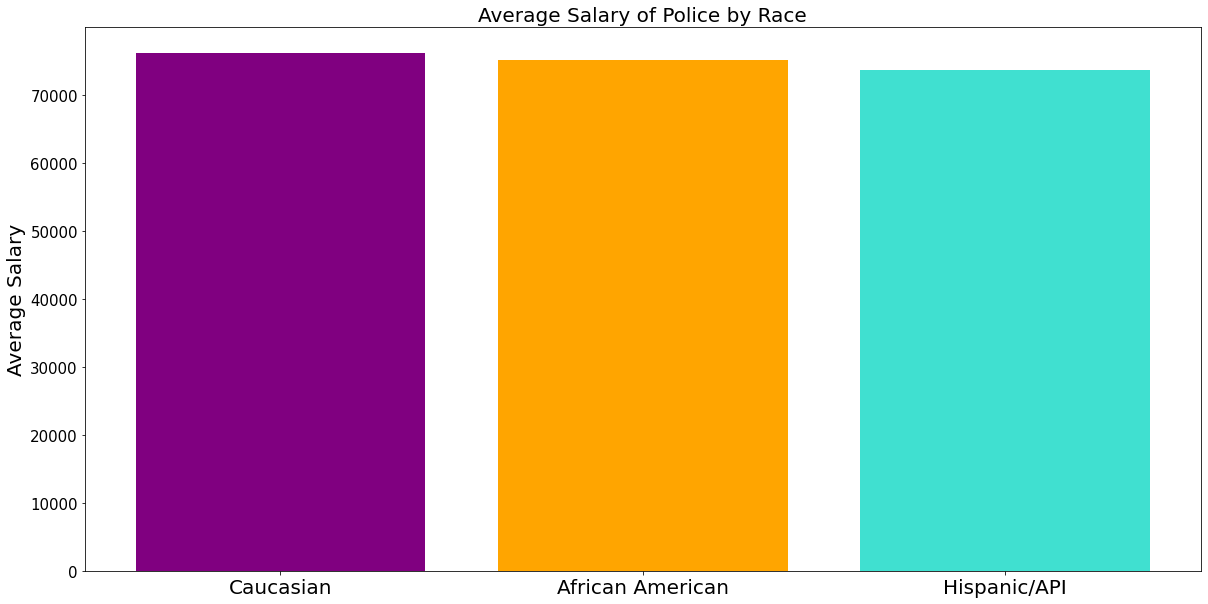

In [165]:
# Merge profile and salary data

profiles_with_salary = salary_cleaned.merge(officer_profiles_cleaned, left_on = "UID", right_on = "UID")
profiles_with_salary = profiles_with_salary[profiles_with_salary.get("race") != "NATIVE AMERICAN/ALASKAN NATIVE"]
profiles_with_salary


# Plot salaries by race (for all ranks)
white = profiles_with_salary[profiles_with_salary.get("race") == "WHITE"]
black = profiles_with_salary[profiles_with_salary.get("race") == "BLACK"]
hisp_api = profiles_with_salary[(profiles_with_salary.get("race") == "HISPANIC") | (profiles_with_salary.get("race") == "ASIAN/PACIFIC ISLANDER")]

plots.figure(figsize=(15, 10))
plots.hist(black.get("salary"), density = True, alpha = .5, color = 'orange', bins = 50, label = "African American")
plots.hist(white.get("salary"), density = True, alpha = .5, color = 'purple', bins = 50, label = "Caucasian")
plots.hist(hisp_api.get("salary"), density = True, alpha = .5, color = 'turquoise', bins = 50, label = "Hispanic/API")
plots.legend(loc = "upper right", prop={'size': 20})
plots.title("Salary of Police by Race", size = 20)
plots.xlabel("Salary", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

# Plot average salary per race (for all ranks)
dictionary = {"Caucasian": salary_by_race.get("salary").loc["WHITE"], "African American": salary_by_race.get("salary").loc["BLACK"], "Hispanic/API": (((salary_by_race.get("salary").loc["HISPANIC"]) + (salary_by_race.get("salary").loc["ASIAN/PACIFIC ISLANDER"]))/2)}

plots.figure(figsize=(20, 10))
plots.title("Average Salary of Police by Race", size = 20)
plots.bar(list(dictionary.keys()), list(dictionary.values()), color = ["purple", "orange", "turquoise"])
plots.ylabel("Average Salary", size = 20)
plots.xticks(fontsize = 20)
plots.yticks(fontsize = 15)
plots.show()

In [167]:
# Count number of officers per rank
count_profiles_with_salary = profiles_with_salary.groupby(["cleaned_rank"]).count().reset_index()
count_profiles_with_salary

,cleaned_rank,UID,pay_grade,salary,race,appointed_date,resignation_date,gender
0,ASSISTANT DEPUTY SUPERINTENDENT,14,14,14,14,14,14,14
1,ASSISTANT SUPERINTENDENT,12,12,12,12,12,12,12
2,CAPTAIN,371,371,371,371,371,112,371
3,CHIEF,254,254,254,254,254,150,254
4,COMMANDER,811,811,811,811,811,353,811
5,DEPUTY CHIEF,365,365,365,365,365,145,365
6,DEPUTY SUPERINTENDENT,56,56,56,56,56,56,56
7,DETECTIVE,22248,22248,22248,22248,22248,7755,22248
8,DIRECTOR OF CAPS,9,9,9,9,9,0,9
9,FIELD TRAINING OFFICER,3044,3044,3044,3044,3044,532,3044


In [168]:
# Table of average salaries per rank by race
rank_profiles_with_salary = profiles_with_salary.groupby("cleaned_rank").mean()
rank_profiles_with_salary= rank_profiles_with_salary.drop(columns = "UID")
rank_profiles_with_salary

rank_by_race = profiles_with_salary.groupby(["cleaned_rank", "race"]).mean().drop(columns = "UID").reset_index()
rank_by_race

,cleaned_rank,race,salary
0,ASSISTANT DEPUTY SUPERINTENDENT,HISPANIC,124081.200000
1,ASSISTANT DEPUTY SUPERINTENDENT,WHITE,130215.333333
2,ASSISTANT SUPERINTENDENT,BLACK,152972.000000
3,CAPTAIN,ASIAN/PACIFIC ISLANDER,136170.000000
4,CAPTAIN,BLACK,96359.886792
5,CAPTAIN,HISPANIC,104243.842105
6,CAPTAIN,WHITE,97717.870968
7,CHIEF,BLACK,137551.870130
8,CHIEF,HISPANIC,153165.272727
9,CHIEF,WHITE,154272.586466


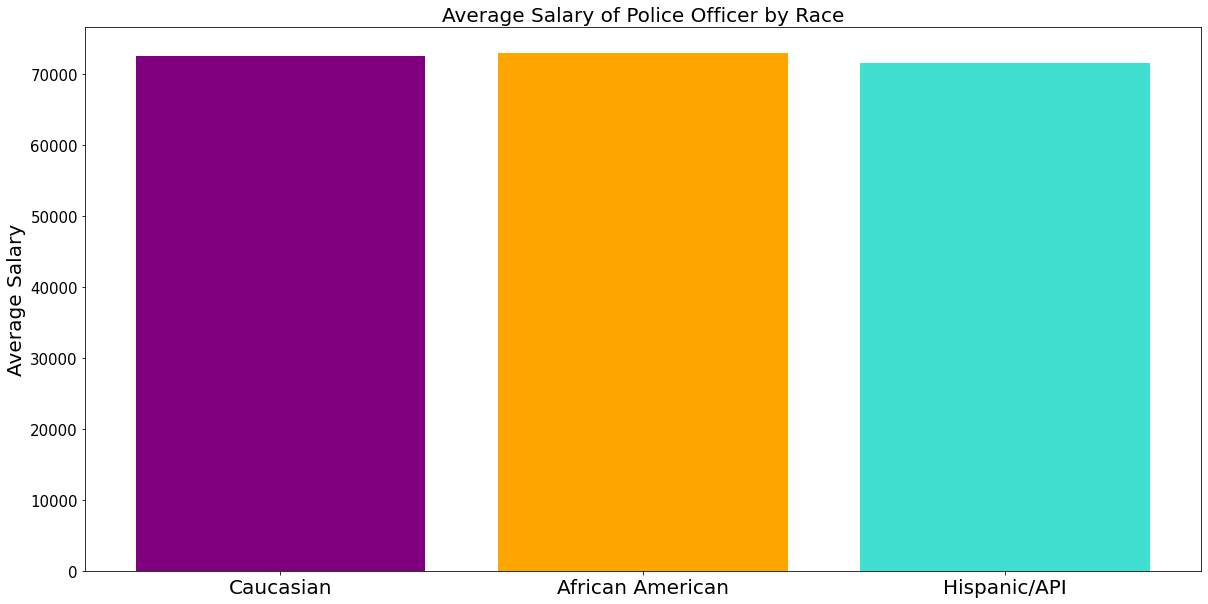

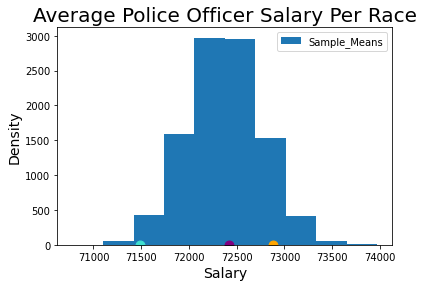

p_value: 0.098
p_value is > 0.05, therefore the income inequality between hispanic and asian/pacific islander sergeants and sergeants of other races is not significant


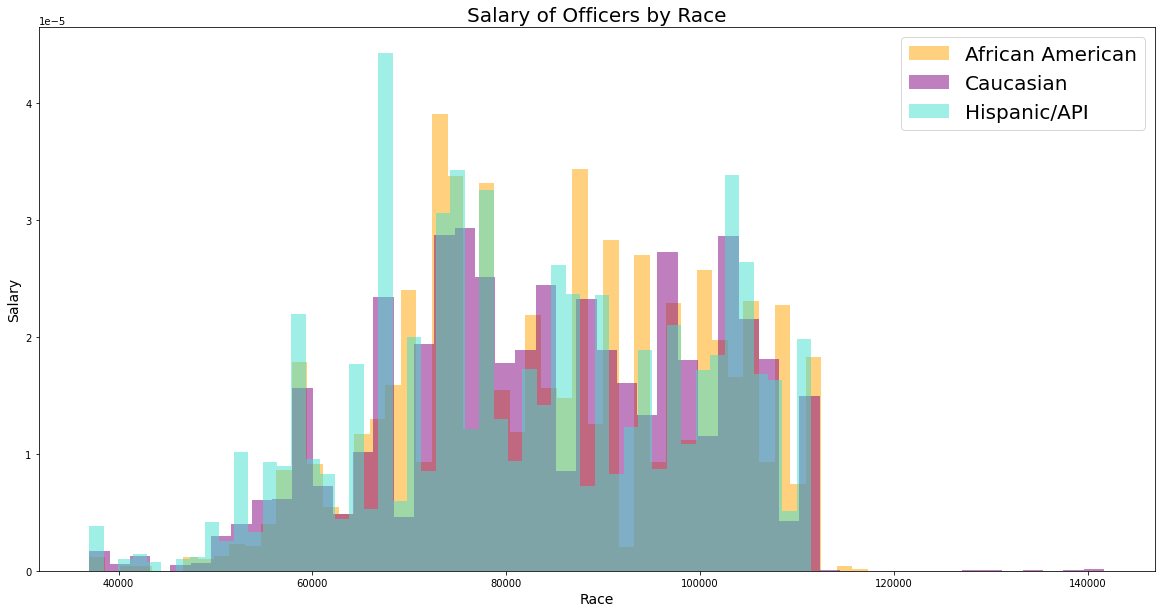

In [211]:
# OFFICER ANALYSIS

# Table containing only officers of rank police officer
officer_by_race = profiles_with_salary[profiles_with_salary.get("cleaned_rank") == "POLICE OFFICER"]

# Get mean salary of officers per race
officer_mean_by_race = officer_by_race.groupby("race").mean()
black_officer_mean_salary = officer_mean_by_race.get("salary").loc["BLACK"]
hispanic_api_officer_mean_salary = ((officer_mean_by_race.get("salary").loc["HISPANIC"] + 
                            officer_mean_by_race.get("salary").loc["ASIAN/PACIFIC ISLANDER"]) / 2)
white_officer_mean_salary = officer_mean_by_race.get("salary").loc["WHITE"]

# Plot mean salary of officers per race
dictionary = {"Caucasian": white_officer_mean_salary, "African American": black_officer_mean_salary, "Hispanic/API": hispanic_api_officer_mean_salary}

plots.figure(figsize=(20, 10))
plots.title("Average Salary of Police Officer by Race", size = 20)
plots.bar(list(dictionary.keys()), list(dictionary.values()), color = ["purple", "orange", "turquoise"])
plots.ylabel("Average Salary", size = 20)
plots.xticks(fontsize = 20)
plots.yticks(fontsize = 15)
plots.show()

# Run bootstrap
sample_means = np.array([])

for i in np.arange(10000):
    resampled_table = officer_by_race.sample(1000, replace=True)
    mean = resampled_table.get("salary").mean()
    sample_means = np.append(sample_means, mean)
    
# Distribution with mean salaries of each race
    
pd.DataFrame().assign(Sample_Means=sample_means).plot(kind='hist')
plots.scatter(hispanic_api_officer_mean_salary, 0, color='turquoise', s=80).set_zorder(2)
plots.scatter(black_officer_mean_salary, 0, color='orange', s=80).set_zorder(2)
plots.scatter(white_officer_mean_salary, 0, color='purple', s=80).set_zorder(2)
plots.title("Average Police Officer Salary Per Race", size = 20)
plots.xlabel("Salary", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

# Find statistical significance of hispanic/api officers having a smaller average salary
p_value_hispanic_api_officer = np.count_nonzero(hispanic_api_officer_mean_salary >= sample_means)/1000
print("p_value:", p_value_hispanic_api_officer)
print("p_value is > 0.05, therefore the income inequality between hispanic and asian/pacific islander sergeants and sergeants of other races is not significant")


# Overlayed Histogram?

white = police_by_race[police_by_race.get("race") == "WHITE"]
black = police_by_race[police_by_race.get("race") == "BLACK"]
hisp_api = police_by_race[(police_by_race.get("race") == "HISPANIC") | (police_by_race.get("race") == "ASIAN/PACIFIC ISLANDER")]


plots.figure(figsize=(20, 10))
plots.hist(black.get("salary"), density = True, alpha = .5, color = 'orange', bins = 50, label = "African American")
plots.hist(white.get("salary"), density = True, alpha = .5, color = 'purple', bins = 50, label = "Caucasian")
plots.hist(hisp_api.get("salary"), density = True, alpha = .5, color = 'turquoise', bins = 50, label = "Hispanic/API")
plots.legend(loc = "upper right", prop={'size': 20})
plots.title("Salary of Officers by Race", size = 20)
plots.xlabel("Race", size = 14)
plots.ylabel("Salary", size = 14)
plots.show()


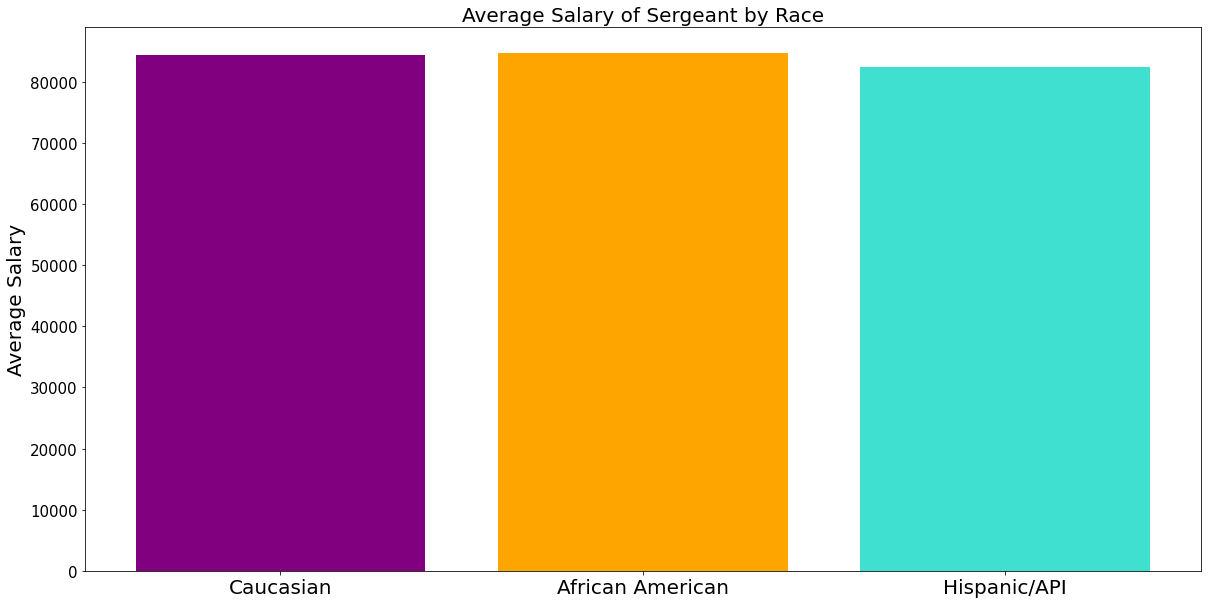

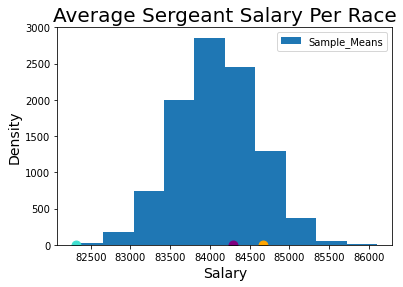

p_value: 0.002
p_value is < 0.05, therefore the income inequality between hispanic and asian/pacific islander sergeants and sergeants of other races is significant


In [212]:
# SERGEANT ANALYSIS

# Table containing only officers of rank sergeant
sergeant_by_race = profiles_with_salary[profiles_with_salary.get("cleaned_rank") == "SERGEANT"]

# Get mean salary of sergeants per race
sergeant_mean_by_race = sergeant_by_race.groupby("race").mean()
black_sergeant_mean_salary = sergeant_mean_by_race.get("salary").loc["BLACK"]
hispanic_api_sergeant_mean_salary = ((sergeant_mean_by_race.get("salary").loc["HISPANIC"] + 
                            sergeant_mean_by_race.get("salary").loc["ASIAN/PACIFIC ISLANDER"]) / 2)
white_sergeant_mean_salary = sergeant_mean_by_race.get("salary").loc["WHITE"]

# Plot mean salary of sergeants per race
dictionary = {"Caucasian": white_sergeant_mean_salary, "African American": black_sergeant_mean_salary, "Hispanic/API": hispanic_api_sergeant_mean_salary}

plots.figure(figsize=(20, 10))
plots.title("Average Salary of Sergeant by Race", size = 20)
plots.bar(list(dictionary.keys()), list(dictionary.values()), color = ["purple", "orange", "turquoise"])
plots.ylabel("Average Salary", size = 20)
plots.xticks(fontsize = 20)
plots.yticks(fontsize = 15)
plots.show()

# Run bootstrap
sample_means = np.array([])

for i in np.arange(10000):
    resampled_table = sergeant_by_race.sample(1000, replace=True)
    mean = resampled_table.get("salary").mean()
    sample_means = np.append(sample_means, mean)
    
# Distribution with mean salaries of each race
    
pd.DataFrame().assign(Sample_Means=sample_means).plot(kind='hist')
plots.scatter(hispanic_api_sergeant_mean_salary, 0, color='turquoise', s=80).set_zorder(2)
plots.scatter(black_sergeant_mean_salary, 0, color='orange', s=80).set_zorder(2)
plots.scatter(white_sergeant_mean_salary, 0, color='purple', s=80).set_zorder(2)
plots.title("Average Sergeant Salary Per Race", size = 20)
plots.xlabel("Salary", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

# Find statistical significance of hispanic/api officers having a smaller average salary
p_value_hispanic_api_sergeant = np.count_nonzero(hispanic_api_sergeant_mean_salary >= sample_means)/1000
print("p_value:", p_value_hispanic_api_sergeant)
print("p_value is < 0.05, therefore the income inequality between hispanic and asian/pacific islander sergeants and sergeants of other races is significant")


# Overlayed Histogram?

# white = sergeant_by_race[sergeant_by_race.get("race") == "WHITE"]
# white.plot(kind = 'hist', y = "salary")

# black = sergeant_by_race[sergeant_by_race.get("race") == "BLACK"]
# black.plot(kind = 'hist', y = "salary")

# hisp = sergeant_by_race[(sergeant_by_race.get("race") == "HISPANIC") | (sergeant_by_race.get("race") == "ASIAN/PACIFIC ISLANDER")]
# hisp.plot(kind = 'hist', y = "salary")

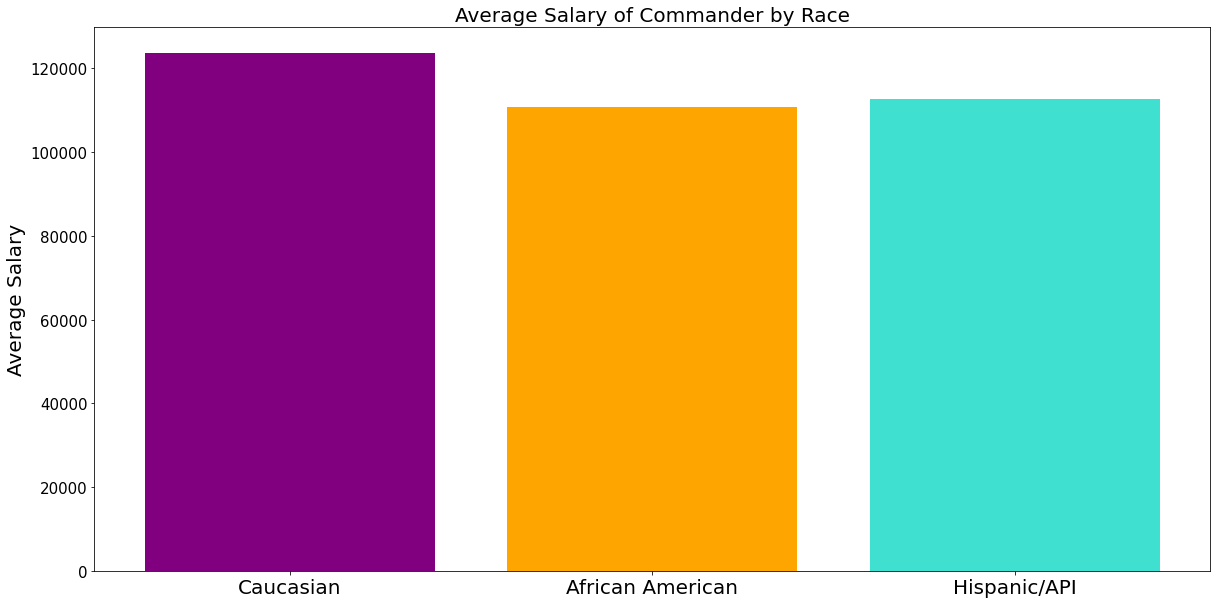

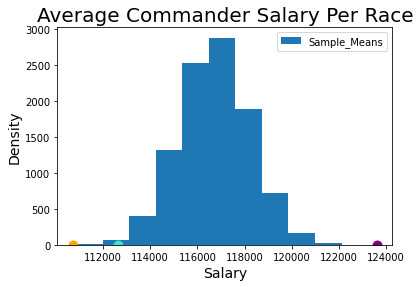

p_value hispanic/api: 0.025
p_value is < 0.05, therefore the income inequality between hispanic and asian/pacific islander commanders and commanders of other races is significant
p_value black: 0.0
p_value is < 0.05, therefore the income inequality between black commanders and commanders of other races is significant


In [188]:
# COMMANDER ANALYSIS

# Table containing only officers of rank sergeant
commander_by_race = profiles_with_salary[profiles_with_salary.get("cleaned_rank") == "COMMANDER"]

# Get mean salary of sergeants per race
commander_mean_by_race = commander_by_race.groupby("race").mean()
black_commander_mean_salary = commander_mean_by_race.get("salary").loc["BLACK"]
hispanic_api_commander_mean_salary = ((commander_mean_by_race.get("salary").loc["HISPANIC"] + 
                            commander_mean_by_race.get("salary").loc["ASIAN/PACIFIC ISLANDER"]) / 2)
white_commander_mean_salary = commander_mean_by_race.get("salary").loc["WHITE"]

# Plot mean salary of sergeants per race
dictionary = {"Caucasian": white_commander_mean_salary, "African American": black_commander_mean_salary, "Hispanic/API": hispanic_api_commander_mean_salary}

plots.figure(figsize=(20, 10))
plots.title("Average Salary of Commander by Race", size = 20)
plots.bar(list(dictionary.keys()), list(dictionary.values()), color = ["purple", "orange", "turquoise"])
plots.ylabel("Average Salary", size = 20)
plots.xticks(fontsize = 20)
plots.yticks(fontsize = 15)
plots.show()

# Run bootstrap
sample_means = np.array([])

for i in np.arange(10000):
    resampled_table = commander_by_race.sample(500, replace=True)
    mean = resampled_table.get("salary").mean()
    sample_means = np.append(sample_means, mean)
    
# Distribution with mean salaries of each race
    
pd.DataFrame().assign(Sample_Means=sample_means).plot(kind='hist')
plots.scatter(hispanic_api_commander_mean_salary, 0, color='turquoise', s=80).set_zorder(2)
plots.scatter(black_commander_mean_salary, 0, color='orange', s=80).set_zorder(2)
plots.scatter(white_commander_mean_salary, 0, color='purple', s=80).set_zorder(2)
plots.title("Average Commander Salary Per Race", size = 20)
plots.xlabel("Salary", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

# Find statistical significance of hispanic/api officers having a smaller average salary
p_value_hispanic_api_commander = np.count_nonzero(hispanic_api_commander_mean_salary >= sample_means)/1000
print("p_value hispanic/api:", p_value_hispanic_api_commander)
print("p_value is < 0.05, therefore the income inequality between hispanic and asian/pacific islander commanders and commanders of other races is significant")


p_value_black_commander = np.count_nonzero(black_commander_mean_salary >= sample_means)/1000
print("p_value black:", p_value_black_commander)
print("p_value is < 0.05, therefore the income inequality between black commanders and commanders of other races is significant")

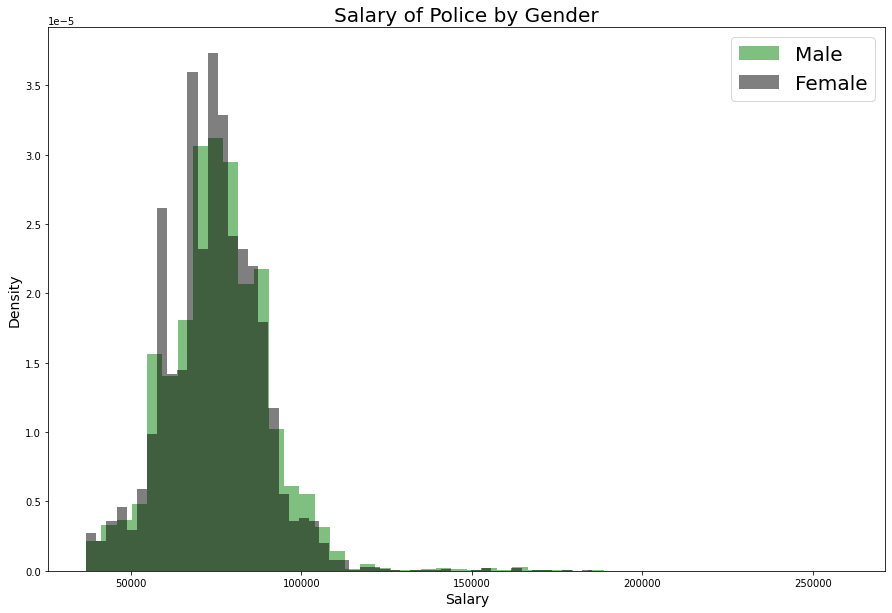

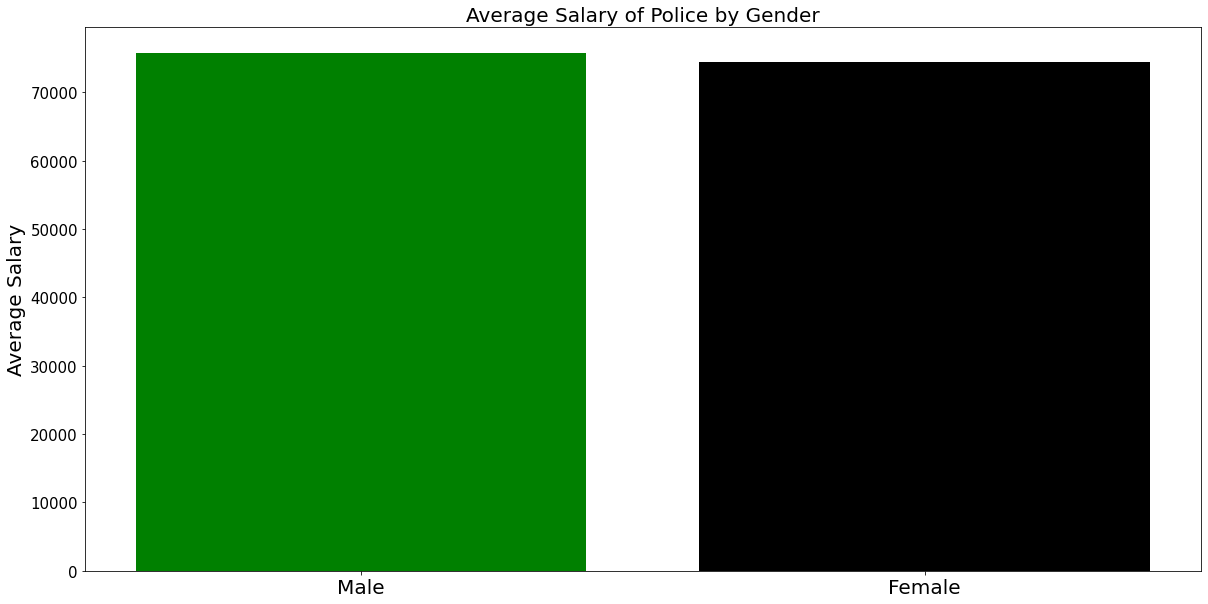

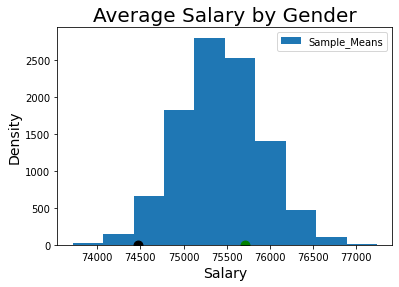

p_value: 0.217
p_value is > 0.05, therefore the income inequality between female police officers and male officers is not significant


In [210]:
# GENDER ANALYSIS


profiles_with_gender = salary_cleaned.merge(officer_profiles_cleaned, left_on = "UID", right_on = "UID")

# Plot salaries by gender (for all ranks)
male = profiles_with_gender[profiles_with_gender.get("gender") == "MALE"]
female = profiles_with_gender[profiles_with_gender.get("gender") == "FEMALE"]

plots.figure(figsize=(15, 10))
plots.hist(male.get("salary"), density = True, alpha = .5, color = 'green', bins = 50, label = "Male")
plots.hist(female.get("salary"), density = True, alpha = .5, color = 'black', bins = 50, label = "Female")
plots.legend(loc = "upper right", prop={'size': 20})
plots.title("Salary of Police by Gender", size = 20)
plots.xlabel("Salary", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

# Plot average salary by gender (for all ranks)
male_mean_salary = male.get("salary").mean()
female_mean_salary = female.get("salary").mean()
dictionary = {"Male": male_mean_salary, "Female": female_mean_salary}

plots.figure(figsize=(20, 10))
plots.title("Average Salary of Police by Gender", size = 20)
plots.bar(list(dictionary.keys()), list(dictionary.values()), color = ["green", "black"])
plots.ylabel("Average Salary", size = 20)
plots.xticks(fontsize = 20)
plots.yticks(fontsize = 15)
plots.show()

# Run bootstrap
sample_means = np.array([])

for i in np.arange(10000):
    resampled_table = profiles_with_gender.sample(1000, replace=True)
    mean = resampled_table.get("salary").mean()
    sample_means = np.append(sample_means, mean)
    
# Distribution with mean salaries of each gender
    
pd.DataFrame().assign(Sample_Means=sample_means).plot(kind='hist')
plots.scatter(male_mean_salary, 0, color='green', s=80).set_zorder(2)
plots.scatter(female_mean_salary, 0, color='black', s=80).set_zorder(2)
plots.title("Average Salary by Gender", size = 20)
plots.xlabel("Salary", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

# Find statistical significance
p_value_female_salary = np.count_nonzero(female_mean_salary >= sample_means)/1000
print("p_value:", p_value_female_salary)
print("p_value is > 0.05, therefore the income inequality between female police officers and male officers is not significant")



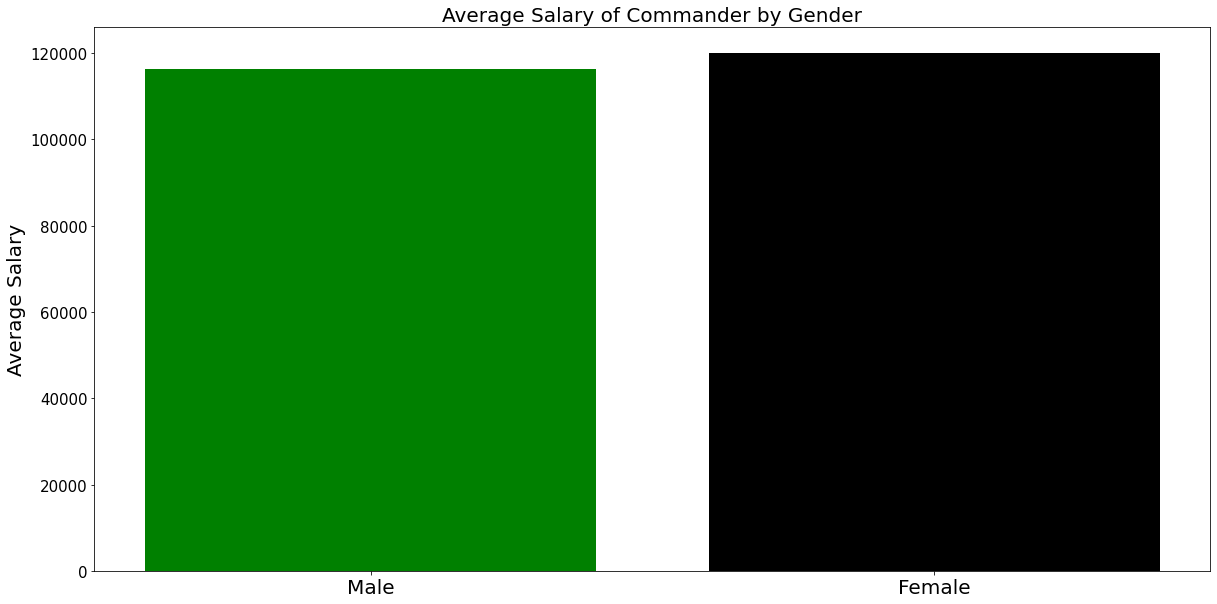

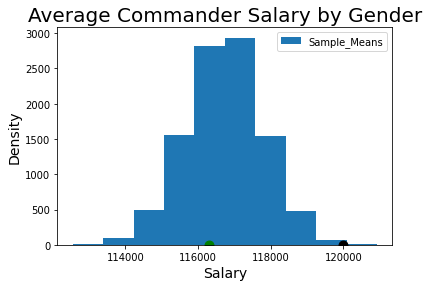

In [207]:
# GENDER VS. COMMANDER SALARY ANALYSIS

# Table containing only officers of rank sergeant
commander_by_gender = profiles_with_gender[profiles_with_gender.get("cleaned_rank") == "COMMANDER"]

# Get mean salary of commanders by gender
commander_mean_by_gender = commander_by_gender.groupby("gender").mean()
male_commander_mean_salary = commander_mean_by_gender.get("salary").loc["MALE"]
female_commander_mean_salary = commander_mean_by_gender.get("salary").loc["FEMALE"]

# Plot mean salary of sergeants per gender
dictionary = {"Male": male_commander_mean_salary, "Female": female_commander_mean_salary}

plots.figure(figsize=(20, 10))
plots.title("Average Salary of Commander by Gender", size = 20)
plots.bar(list(dictionary.keys()), list(dictionary.values()), color = ["green", "black"])
plots.ylabel("Average Salary", size = 20)
plots.xticks(fontsize = 20)
plots.yticks(fontsize = 15)
plots.show()

# Run bootstrap
sample_means = np.array([])

for i in np.arange(10000):
    resampled_table = commander_by_gender.sample(1000, replace=True)
    mean = resampled_table.get("salary").mean()
    sample_means = np.append(sample_means, mean)
    
# Distribution with mean salaries of each gender
    
pd.DataFrame().assign(Sample_Means=sample_means).plot(kind='hist')
plots.scatter(male_commander_mean_salary, 0, color='green', s=80).set_zorder(2)
plots.scatter(female_commander_mean_salary, 0, color='black', s=80).set_zorder(2)
plots.title("Average Commander Salary by Gender", size = 20)
plots.xlabel("Salary", size = 14)
plots.ylabel("Density", size = 14)
plots.show()